In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import illustris_python as il

In [195]:
#/Users/festabu/Illustris-3/output/groups_135/groups_135.0.hdf5

In [4]:
basePath = '/Users/festabu/Illustris-3/output/'

In [5]:
fields = ['SubhaloMass','SubhaloSFRinRad']

In [6]:
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)

In [7]:
fields2 = ['SubhaloHalfmassRadType','SubhaloMassInRad']

In [8]:
subhalos2 = il.groupcat.loadSubhalos(basePath,135,fields=fields2)

In [9]:
subhalos.keys()

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad'])

In [28]:
subhalos2['SubhaloHalfmassRadType'].shape

(121209, 6)

### Mass vs SFR Plot

In [11]:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704

Text(0, 0.5, 'Star Formation Rate [$M_\\odot / yr$]')

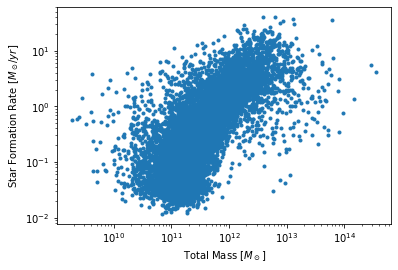

In [12]:
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]')
plt.ylabel('Star Formation Rate [$M_\odot / yr$]')

### Mass vs Size

In [13]:
subhalos2.keys()

dict_keys(['count', 'SubhaloHalfmassRadType', 'SubhaloMassInRad'])

In [14]:
subhalos2['SubhaloHalfmassRadType']

array([[748.87006 , 665.09564 ,   0.      ,   0.      ,  60.530327,
          0.      ],
       [459.7693  , 338.59738 ,   0.      ,   0.      ,  13.493493,
          0.      ],
       [ 15.898374,  60.235096,   0.      ,   0.      ,  13.08486 ,
          0.      ],
       ...,
       [  0.      ,  22.062662,   0.      ,   0.      ,   0.      ,
          0.      ],
       [ 52.009342,  23.37706 ,   0.      ,   0.      ,   0.      ,
          0.      ],
       [  0.      ,  17.402239,   0.      ,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [30]:
# For SubhaloHalfmassRadType, choose columns 0 and 4 bc they correspond to GAS and STARS & WIND particles, respectively
#subhalos2['SubhaloHalfmassRadType'][:,[0,4]]
subhalos2['SubhaloHalfmassRadType'][:,4] # only stellar mass contributing to the galaxy mass 

array([60.530327, 13.493493, 13.08486 , ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [31]:
subhalos2['SubhaloHalfmassRadType'][:,4].shape

(121209,)

In [36]:
# Add the mass of the GAS and STARS & WIND
galaxy_size=subhalos2['SubhaloHalfmassRadType'][:,4]

In [52]:
galaxy_size

array([60.530327, 13.493493, 13.08486 , ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [53]:
galaxy_size=galaxy_size/0.7

In [54]:
galaxy_size

array([86.47189 , 19.276419, 18.692657, ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [55]:
galaxy_mass=subhalos2['SubhaloMassInRad']

In [56]:
galaxy_mass

array([1612.1837  ,   91.142715,   92.59857 , ...,    0.      ,
          0.      ,    0.      ], dtype=float32)

In [57]:
galaxy_mass=galaxy_mass/0.7

In [58]:
galaxy_mass

array([2303.1196 ,  130.20389,  132.28368, ...,    0.     ,    0.     ,
          0.     ], dtype=float32)

In [59]:
galaxy_mass=galaxy_mass*1e10

In [60]:
galaxy_mass

array([2.3031196e+13, 1.3020388e+12, 1.3228368e+12, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

### Scatter plot

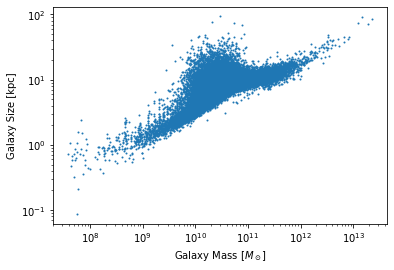

In [62]:
plt.plot(galaxy_mass,galaxy_size, '.', markersize=2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
plt.savefig("Mass_vs_Size_updated_v2.jpeg", dpi=500)
plt.show()

### 2D Histogram

In [136]:
def hist2dplot(axis,x,y,fill=True,**kwargs):
    
    h,xed,yed=np.histogram2d(x,y)
    
    
    h=np.transpose(h)
    total=h.sum()
    h=h/total
    hflat=np.sort(np.reshape(h,-1)) #makes 1D and sorted 
    csum=np.cumsum(hflat)
    values=1.0-np.array([0.9973,0.9545,0.6827,0.0])
    
    levels=[]
    
    for val in values:
        idx = (np.abs(csum - val)).argmin()
        levels.append(hflat[idx])

    if fill:
        colors=['#f7f7f7','#cccccc','#969696','#525252'] #gray
#        colors=['#ffffcc','#c2e699','#78c679','#238443'] #green 
        axis.contourf(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    else:
        colors=['#fdcc8a','#fc8d59','#d7301f']
        axis.contour(h,levels,colors=colors,extent=[xed[0],xed[-1],yed[0],yed[-1]])
    
    

In [135]:
h,xed,yed=np.histogram2d(galaxy_mass, galaxy_size)

In [140]:
def normalize(an_array):
    norm = np.linalg.norm(an_array)
    return an_array/norm

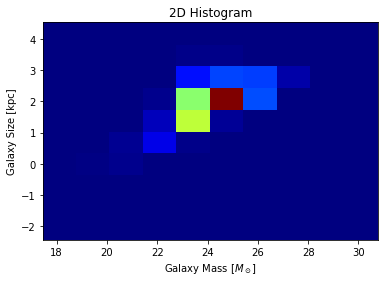

In [180]:
plt.hist2d(galaxy_mass_log, galaxy_size_log, cmap = plt.cm.jet)
plt.title('2D Histogram')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
plt.savefig("Mass_vs_Size_Hist2D_pyplot_log.jpeg", dpi=500)
plt.show()

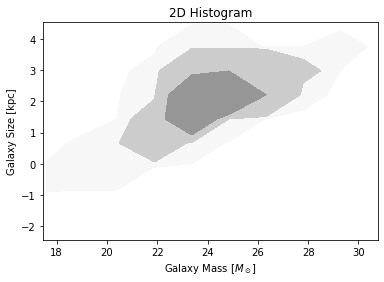

In [179]:
fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True)
plt.title('2D Histogram')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
plt.savefig("Mass_vs_Size_hist2Dplot_log.jpeg", dpi=500)

#### Logscale of size and mass entries

In [164]:
with np.errstate(divide='ignore'):
    galaxy_mass_log = np.where(galaxy_mass>0, np.log(galaxy_mass), 0)
    galaxy_size_log = np.where(galaxy_size>0, np.log(galaxy_size), 0)

mask_non_zero_size = galaxy_mass_log>0
galaxy_mass_log = galaxy_mass_log[mask_non_zero_size]
galaxy_size_log = galaxy_size_log[mask_non_zero_size]
    #     galaxy_mass_log=np.log10(galaxy_mass)
# np.count_nonzero(galaxy_size)

<ipython-input-164-8a6b8348f7b2>:2: RuntimeWarning: overflow encountered in log
  galaxy_mass_log = np.where(galaxy_mass>0, np.log(galaxy_mass), 0)


In [172]:
zero_mass = galaxy_mass==0
zero_size = galaxy_size==0

In [173]:
np.sum(zero_mass == zero_size)

121209

In [166]:
mask_non_zero_size

array([ True,  True,  True, ..., False, False, False])

In [158]:
galaxy_mass_log

array([30.76787 , 27.894953, 27.910799, ...,  0.      ,  0.      ,
        0.      ], dtype=float32)

In [150]:
galaxy_size.shape

(121209,)

In [168]:
galaxy_size_log.shape

(29165,)

In [167]:
np.count_nonzero(galaxy_size_log)

29165

Text(0, 0.5, 'Counts')

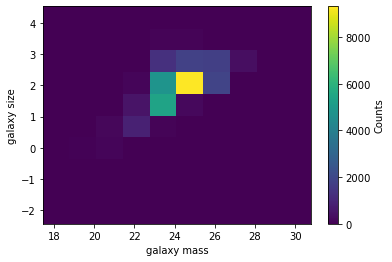

In [165]:
fig3 = plt.figure()
plt.hist2d(galaxy_mass_log,galaxy_size_log, bins=10)
plt.xlabel('galaxy mass')
plt.ylabel('galaxy size')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

### Scatter plot logarithmic scale

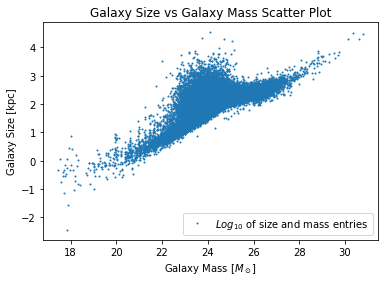

In [190]:
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2, label='$ Log_{10} $ of size and mass entries')
plt.title('Galaxy Size vs Galaxy Mass Scatter Plot')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc]')
plt.xlabel('Galaxy Mass [$ M_\odot $]')
plt.legend(loc='lower right')
plt.savefig("Mass_vs_Size_updated_v3.jpeg", dpi=500)
plt.show()

### Histogram 2D and Scatter Plot overlap

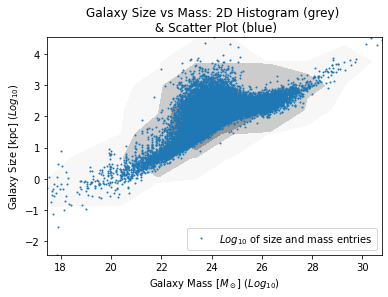

In [194]:
fig2, ax =plt.subplots()
#axis=fig2.add_subplot()
hist2dplot(ax, galaxy_mass_log, galaxy_size_log, fill=True)
plt.title('Galaxy Size vs Mass: 2D Histogram (grey) \n & Scatter Plot (blue)')
#plt.ylabel('Galaxy Size [kpc]')
#plt.xlabel('Galaxy Mass [$ M_\odot $]')
#plt.savefig("Mass_vs_Size_hist2Dplot_log.jpeg", dpi=500)
plt.plot(galaxy_mass_log,galaxy_size_log, '.', markersize=2, label='$ Log_{10} $ of size and mass entries')
#plt.title('Galaxy Size vs Galaxy Mass Scatter Plot')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Galaxy Size [kpc] ($ Log_{10} $)')
plt.xlabel('Galaxy Mass [$ M_\odot $] ($ Log_{10} $)')
plt.legend(loc='lower right')
#plt.savefig("Mass_vs_Size_hist2d_and_scatterplot.jpeg", dpi=500)
plt.show()